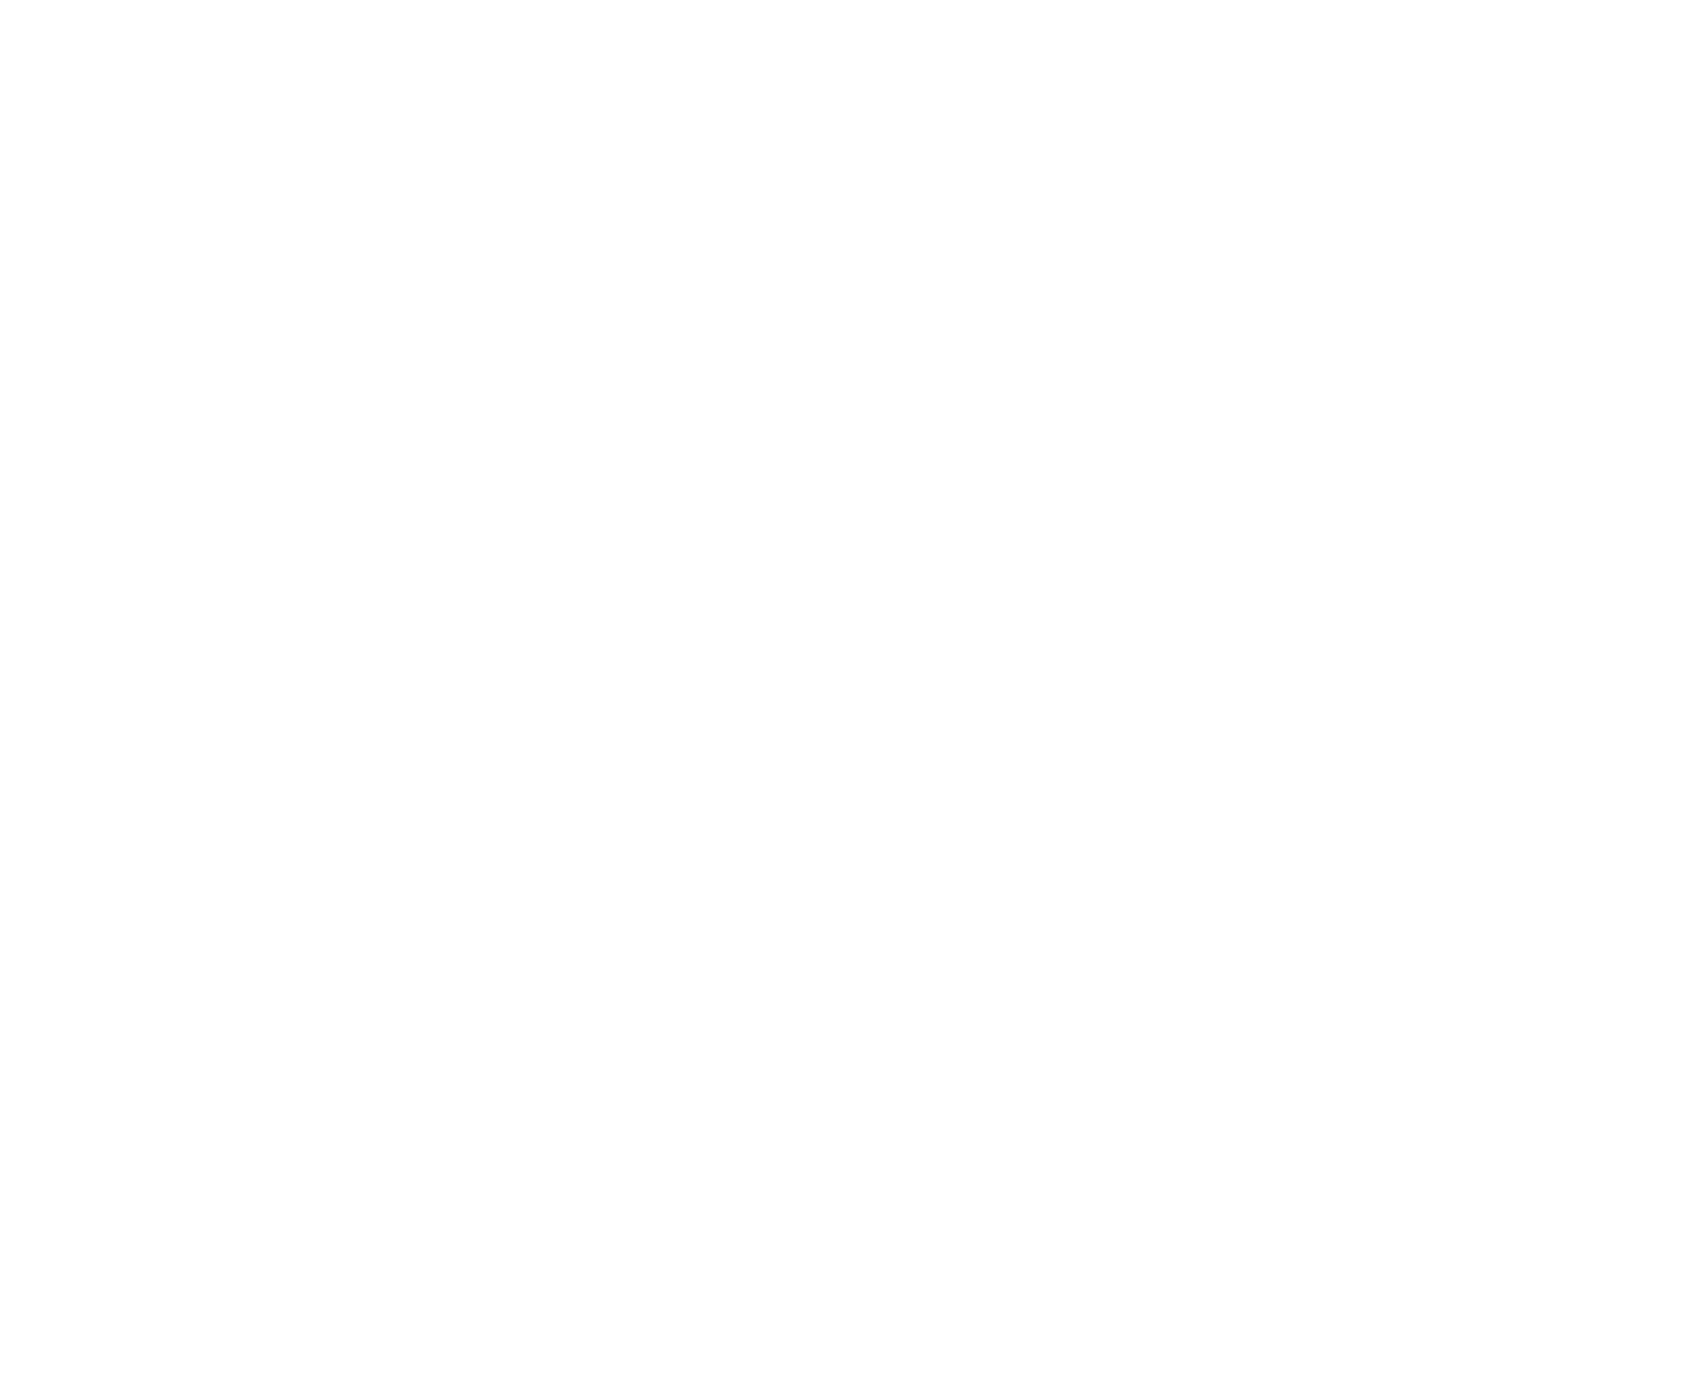

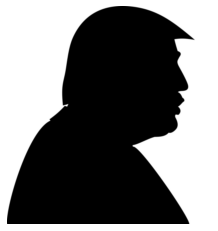

In [60]:
%matplotlib inline
import numpy as np
import math
import csv
import re
import nltk
from PIL import Image
import os
from os import path
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
    nltk.download("words")

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def split(word): 
    return list(word) 

def process_document(text):
    # Convert words to lower case
    #print(text)
    text = text.lower()
    
    text = text.split()
    newtext = [x for x in text if not x.startswith('@') and not x.startswith('https')] ##remove @ and link
    stop_words = stopwords.words('english')
    newtext = [x for x in newtext if x not in stop_words] ## remove stopwords
    
    newtext = ' '.join(newtext)
    
    tokenizer = RegexpTokenizer(r'\w+')
    newtext = tokenizer.tokenize(newtext)
    
    newtext = [WordNetLemmatizer().lemmatize(x,'v') for x in newtext]
    label = 0
    for ele in newtext:
        if ele =='amp':
            label = 1

    newtext = ' '.join(newtext)
    if label == 1:
        newtext = newtext.replace('amp','and')
   
    
    newtext = newtext.split()
    newtext = [x for x in newtext if x != 'donald']
    newtext = [x for x in newtext if x != 'trump']
    newtext = [x for x in newtext if x != 'via']
    newtext = [x for x in newtext if x != 're']
    newtext = [x for x in newtext if x != 'de']
    return newtext



with open('trump.csv',encoding="utf8") as words_file:
        
    csv_reader = csv.DictReader(words_file, delimiter = ',')
    data = []
        
    for row in csv_reader:
        data.append(row['Text'])
            #emoji.append(row['Emoji'])
    data = np.array(data)
words =[]
for i, tweet in enumerate(data):
    a = process_document(tweet)
    words += a
counts = {}
for i in words:
    counts[i] = counts.get(i, 0) + 1
sorted_dict = sorted(counts.items(), key=lambda x: x[1])
top_words = np.array(sorted_dict[-50:][::-1])[:,0]
    
    
top_words = ' '.join(top_words)
    #print(emoji)
    
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    
trump_mask = np.array(Image.open(path.join(d, "dt_3.jpg")))
wc = WordCloud(background_color="black", max_words=2000, mask=trump_mask, contour_width=3, contour_color='steelblue').generate(top_words)
wc.to_file(path.join(d, "Trump.jpeg"))

    
    
plt.figure(figsize=(30,25))
plt.axis("off")
plt.figure()
plt.imshow(trump_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

   
#Hint from: https://blog.emojipedia.org/emoji-sentiment-analysis-2015-2017/
    


In [163]:
import json
from emoji import UNICODE_EMOJI
      
def split(word): 
    return list(word) 


def check_emoji(text):
    all_emoji = []

    for ele in text:
        if ele in UNICODE_EMOJI:
            if ele not in (all_emoji):
                all_emoji.append(ele)        
    emojis = ''.join(all_emoji)
    
    
        
    return emojis
            


with open('../emoji/emoji_final_join.json',encoding='utf-8') as f: 
    emoji_list = json.load(f)

total_emoji = []
for element in data:
    emojis = check_emoji(element)
    if emojis != '':
        emojis = split(emojis)
        for e in emojis:
            if e == '🏻' or e == '🏽'or e== '🏾' or e == '🏿' or e == '🏼':
                break
        
            total_emoji.append(e)

print(total_emoji)



['💩', '😂', '🤣', '🇷', '🇺', '😂', '🤷', '😳', '🤡', '😺', '✏', '👉', '👇', '🤬', '🇺', '🇸', '⚖', '👍', '😂', '🇺', '🇲', '😂', '🙌', '👏', '🤬', '😡', '😕', '😭', '🤡', '😂', '🇺', '🇸', '😆', '©', '🙄', '😎', '🇷', '🇺', '⚠', '💊', '😂', '😂', '😂', '😆', '➡', '🤔', '🤣', '😂', '🇺', '🇸', '😂', '🤦', '😭', '😵', '👉', '♥', '↖', '😂', '🗣', '‼', '😳', '💺', '🤗', '🤣', '😂', '🇺', '🇸', '🙏', '😢', '‼', '🙏', '🇺', '🇸', '✌', '🇧', '🇴', '🤔', '😩', '😂', '🤦', '🤔', '🇺', '🇸', '😂', '🤔', '😢', '😆', '😂', '🙄', '🤣', '👏', '🤷', '🇺', '🇲', '😂', '🤣', '🇺', '🇲', '🤙', '🖕', '🤔', '😉', '🧐', '🤢', '😡', '🤔', '🤔', '😉', '🤔', '👈', '😺', '✏', '🌊', '🇺', '🇸', '😊', '©', '🇺', '🇸', '🦇', '🐷', '💩', '🤡', '🇺', '🇸', '👱', '😓', '😂', '🎧', '📷', '🌊', '🇺', '🇸', '💲', '🇷', '🇺', '🇸', '😡', '🇺', '🇸', '🤷', '❤', '🤘', '😀', '😂', '🤣', '🤭', '✋', '😂', '☹', '🥴', '🤢', '🤮', '🤔', '🇺', '🇸', '🍑', '✌', '😂', '🌊', '🇺', '🇸', '💩', '🙏', '👀', '🚽', '🇺', '🇸', '😎', '😂', '🤔', '🤔', '🤨', '😡', '🇺', '🇸', '🚨', '🙄', '😂', '🤣', '😎', '🤖', '😑', '👇', '🇺', '🇸', '🚂', '😳', '🙏', '🔑', '🇺', '🇸', '♥', '🌊', '🇺', '🇸', '😅', '🇺', '🇸', '👏',

In [164]:
counts = {}
for i in total_emoji:
    counts[i] = counts.get(i, 0) + 1
sorted_dict = sorted(counts.items(), key=lambda x: x[1])
top_words = np.array(sorted_dict[-50:][::-1])[:,0]

In [165]:
print(top_words)

['🇺' '🇸' '😂' '🤣' '🤔' '🙏' '❤' '👍' '🙄' '👏' '👇' '🤦' '🤷' '😳' '😡' '👉' '🇷' '🔥'
 '🌊' '😆' '😭' '🤡' '💩' '🤮' '😉' '😎' '💯' '💙' '🖕' '🥰' '♀' '💪' '😁' '😀' '😩' '🇧'
 '✌' '😢' '‼' '😕' '✏' '😺' '😠' '👎' '😜' '🇬' '💥' '✝' '🇱' '💕']


In [166]:
import copy

count = np.array(sorted_dict[-50:][::-1])[:,1]
newcount = []
for ele in count:
    newcount.append(int(ele))
newcount = list(newcount)